In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)

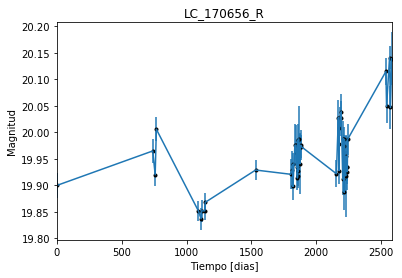

In [2]:
data = np.genfromtxt('LC_170656_R.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]  

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('LC_170656_R')
plt.savefig("LC_170656_R.pdf")

In [3]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [4]:
%%capture capt
sample = model.run_mcmc(20000)

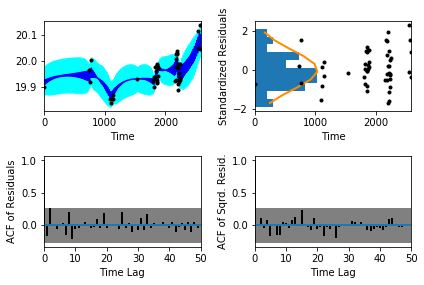

In [5]:
sample.assess_fit()

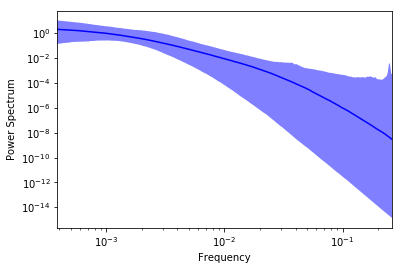

In [6]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [7]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

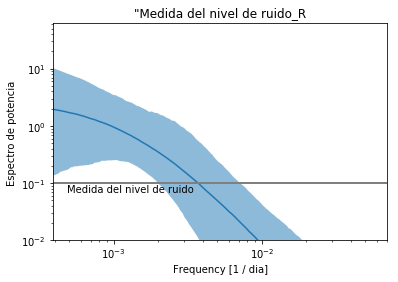

In [8]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))
plt.title('LC_170656_R')
plt.title('"Medida del nivel de ruido_R')
plt.savefig("Medida del nivel de ruido_R.pdf")

Text(0.5,1,'Prediccion , valor esperado LC_170656_R')

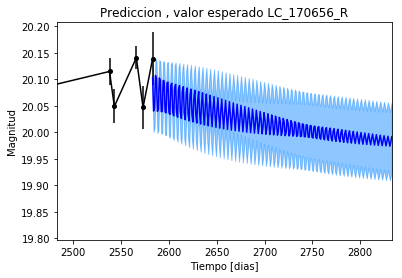

In [9]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado LC_170656_R')

Text(0.5,1,'Prediccion, Caminos simulados  LC_170656_R')

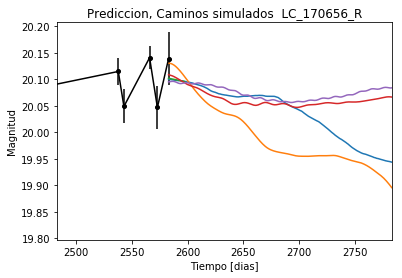

In [10]:
tpredict = t.max() + np.linspace(0.0, 200.0, 250)
npaths = 5
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
for i in range(npaths):
    ysim = sample.simulate(tpredict, bestfit='random')  
    plt.plot(tpredict, ysim)
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.xlim(tpredict.min()-100, tpredict.max())
plt.title('Prediccion, Caminos simulados  LC_170656_R')

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


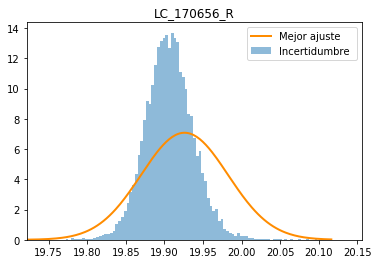

In [11]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')
plt.title('LC_170656_R')
plt.savefig("Mejor_ajuste_LC_170656_R.pdf")

Text(0.5,1,'Interpolacion, camino simulado LC_170656_R')

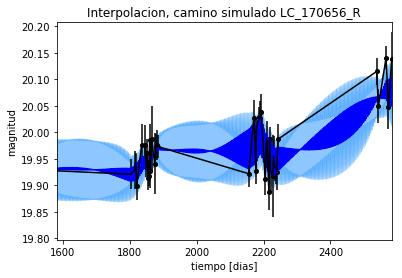

In [12]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_170656_R')

Text(0.5,1,'Interpolacion, camino simulado LC_170656_R')

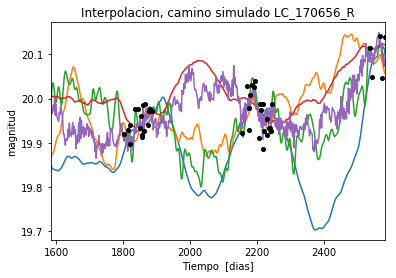

In [13]:
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_170656_R')

In [14]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [15]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 974.109378086
Median: 0.00897605432441
Standard deviation: 0.102369063371
68% credibility interval: [ 0.00111985  0.09839697]
95% credibility interval: [ 0.00049728  0.41463613]
99% credibility interval: [  4.12426490e-04   5.01103851e-01]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 1391.88099883
Median: 0.0033876763686
Standard deviation: 0.0537161138665
68% credibility interval: [ 0.0007773   0.02833429]
95% credibility interval: [ 0.00043848  0.18751996]
99% credibility interval: [ 0.0003953   0.36984927]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 842.710315375
Median: 0.0314991437031
Standard deviation: 0.1213324

In [16]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 339.479751701
Median: 106.599550386
Standard deviation: 1.95637423508
68% credibility interval: [ 104.84367008  108.09785191]
95% credibility interval: [ 102.39224249  111.03047782]
99% credibility interval: [ 100.38374888  112.46581891]


In [17]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 935.180761773
Median: 0.577994431199
Standard deviation: 1.19201176548
68% credibility interval: [ 0.09762638  2.19977753]
95% credibility interval: [ 0.02379139  4.02282337]
99% credibility interval: [ 0.01411301  6.01870909]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 477.735305211
Median: 0.462994064804
Standard deviation: 2.76039680098
68% credibility interval: [ 0.03324301  3.2563704 ]
95% credibility interval: [  3.05381066e-0

In [18]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 6699.04672762
Median: 6.11463847369e-35
Standard deviation: 6.97389510414e+74
68% credibility interval: [  2.27820680e-70   3.16476050e-04]
95% credibility interval: [  1.00865061e-129   1.49508164e+060]
99% credibility interval: [  1.04079025e-144   9.69908660e+065]


In [19]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 2742.33474819
Median: 19.9523992985
Standard deviation: 0.0404572048031
68% credibility interval: [ 19.91781116  19.98737554]
95% credibility interval: [ 19.87193414  20.03881237]
99% credibility interval: [ 19.83224676  20.08961488]


In [20]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 599.155267856
Median: 0.0446242063421
Standard deviation: 0.1377261239
68% credibility interval: [ 0.          0.27545779]
95% credibility interval: [ 0.          0.46408273]
99% credibility interval: [ 0.          0.50328117]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 599.155267856
Median: 0.0446242063421
Standard deviation: 0.1377261239
68% credibility interval: [ 0.          0.27545779]
95% credibility interval: [ 0.          0.46408273]
99% credibility interval: [ 0.          0.50328117]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 837.229670144
Median: 0.0
Standard deviation: 0.000777685921179
68% credib

In [21]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 339.479751701
Median: 106.599550386
Standard deviation: 1.95637423508
68% credibility interval: [ 104.84367008  108.09785191]
95% credibility interval: [ 102.39224249  111.03047782]
99% credibility interval: [ 100.38374888  112.46581891]


In [22]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 1199.68684442
Median: 0.00651682724282
Standard deviation: 0.006273724215
68% credibility interval: [ 0.00392588  0.01163567]
95% credibility interval: [ 0.00258829  0.02310069]
99% credibility interval: [ 0.00205095  0.04006848]


In [23]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 369.246677266
Median: 1.18510105143
Standard deviation: 0.214669769611
68% credibility interval: [ 0.98395466  1.41275889]
95% credibility interval: [ 0.82006791  1.66054646]
99% credibility interval: [ 0.73484839  1.8299439 ]


In [24]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 617.814123287
Median: 0.000169657237243
Standard deviation: 0.0194048625532
68% credibility interval: [  1.53845407e-06   7.94134940e-03]
95% credibility interval: [  3.90872353e-63   4.79530397e-02]
99% credibility interval: [  1.81565567e-69   1.44572124e-01]


In [25]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 974.109378086
Median: (-0.0563982126476-0.636085684853j)
Standard deviation: 1.07821931998
68% credibility interval: [-0.61824640-2.20281097j -0.00703621-1.78627346j]
95% credibility interval: [-2.60523562+0.j         -0.00312449-0.00307769j]
99% credibility interval: [ -3.14852835e+00-3.02671502j  -2.59135206e-03-0.0977955j ]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 1391.88099883
Median: (-0.0212853983847+0.902921715017j)
Standard deviation: 0.928847474583
68% credibility interval: [-0.17802958+2.7871697j  -0.00488390+1.78519191j]
95% credibility interval: [-1.17822264+0.02917654j -0.00275507+0.j        ]
99% credibility interval: [-2.32383152+1.24846515j -0.00248376+0.j        ]
Posterior summary for parameter